# Import necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go 
import json 
import requests
import kaleido  

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
 

ModuleNotFoundError: No module named 'plotly'

In [ ]:
geojson_url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
request = requests.get(geojson_url)

geojson_data = request.json()

In [ ]:
with open("Indian_State_JSON_Data","w") as file:
    file.write(f'{geojson_data}')

# Get the Data

In [ ]:
DOWNLOAD_PATH='./clustering_data.csv'
data = pd.read_csv(DOWNLOAD_PATH)


/tmp/ipykernel_86110/430537085.py:2: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



# Take a quick look at data structure

In [ ]:
data.head()

CircleName      RegionName       DivisionName  \
0  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
1  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
2  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
3  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
4  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   

            OfficeName  Pincode OfficeType  Delivery   District  \
0       Peddakotla B.O   515631         BO  Delivery  ANANTAPUR   
1       Pinnadhari B.O   515631         BO  Delivery  ANANTAPUR   
2  Yerraguntapalle B.O   515631         BO  Delivery  ANANTAPUR   
3  Obulareddipalli B.O   515581         BO  Delivery  ANANTAPUR   
4       Odulapalli B.O   515581         BO  Delivery  ANANTAPUR   

        StateName   Latitude  Longitude  
0  ANDHRA PRADESH    14.5689   77.85624  
1  ANDHRA PRADESH    14.5281  77.857014  
2  ANDHRA PRADESH  14.561111   77.85715  
3  ANDHRA PRADESH    14.2488    78.2588  
4  ANDHRA PRADESH   14.24555    78.2477

In [ ]:
data.shape

(157126, 11)

In [ ]:
data.tail()

CircleName       RegionName      DivisionName  \
157121  Uttar Pradesh Circle  Bareilly Region   Meerut Division   
157122  Uttar Pradesh Circle  Bareilly Region   Meerut Division   
157123  Uttar Pradesh Circle  Bareilly Region   Meerut Division   
157124         Kerala Circle   Calicut Region  Calicut Division   
157125         Kerala Circle   Calicut Region  Calicut Division   

                OfficeName  Pincode OfficeType      Delivery   District  \
157121  Rly Road Meerut SO   250002         PO  Non Delivery     MEERUT   
157122          SGMandi SO   250002         PO  Non Delivery     MEERUT   
157123         W K Road SO   250001         PO  Non Delivery     MEERUT   
157124          Kakkoti SO   673611         PO      Delivery  KOZHIKODE   
157125        Kotuvalli SO   673572         PO      Delivery  KOZHIKODE   

            StateName  Latitude  Longitude  
157121  UTTAR PRADESH     28.98      77.68  
157122  UTTAR PRADESH   28.9724   77.67536  
157123  UTTAR PRADESH     28.99      77.71  
157124         KERALA  11.24529  75.778455  
157125         KERALA     11.35      75.91

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


# Transforming latitudes and Longitudes  to required types

In [ ]:
data[['Latitude','Longitude']]


Latitude  Longitude
0         14.5689   77.85624
1         14.5281  77.857014
2       14.561111   77.85715
3         14.2488    78.2588
4        14.24555    78.2477
...           ...        ...
157121      28.98      77.68
157122    28.9724   77.67536
157123      28.99      77.71
157124   11.24529  75.778455
157125      11.35      75.91

[157126 rows x 2 columns]

In [ ]:
import re
def contains_a_character_other_than_digit(str): 
     matches =  re.search(r"(\d+\.\d+)\D+",str)
     if matches:
         return matches.groups()[0]
     else:
         return False
     


In [ ]:

columns_to_transform= ['Latitude','Longitude']
for col in columns_to_transform:
    for label,value in data[col].items():

        if type(value) == str:
            if contains_a_character_other_than_digit(value) != False:
                data.loc[label,col]= contains_a_character_other_than_digit(value)

    data[col]=data[col].astype(float)


In [ ]:
data.describe(include='object')

CircleName          RegionName     DivisionName OfficeName  \
count                 157126              157073           157124     157126   
unique                    24                  47              461     137150   
top     Uttar Pradesh Circle  DivReportingCircle  Bastar Division  Rampur BO   
freq                   17695               33530             1267         56   

       OfficeType  Delivery   District      StateName  
count      157126    157126     157126         157126  
unique          3         2        732             36  
top            BO  Delivery  ANANTAPUR  UTTAR PRADESH  
freq       131700    149235        943          17692

In [ ]:
data.describe()
data[data['Latitude'] == 8377.00]

CircleName        RegionName     DivisionName  \
120688  Uttar Pradesh Circle  Gorakhpur Region  Deoria Division   

               OfficeName  Pincode OfficeType  Delivery District  \
120688  Bhathwa Tiwari BO   274702         BO  Delivery   DEORIA   

            StateName  Latitude  Longitude  
120688  UTTAR PRADESH    8377.0      26.57

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CircleName    157126 non-null  object 
 1   RegionName    157073 non-null  object 
 2   DivisionName  157124 non-null  object 
 3   OfficeName    157126 non-null  object 
 4   Pincode       157126 non-null  int64  
 5   OfficeType    157126 non-null  object 
 6   Delivery      157126 non-null  object 
 7   District      157126 non-null  object 
 8   StateName     157126 non-null  object 
 9   Latitude      148288 non-null  float64
 10  Longitude     148283 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.2+ MB


In [ ]:
INDIA_LATITUDE_MIN=8.4
INDIA_LATITUDE_MAX=37.6
INDIA_LONGITUDE_MIN=68.7
INDIA_LONGITUDE_MAX=97.25


def check_latitude_not_in_range(lat):
    if INDIA_LATITUDE_MIN <= lat   and lat <= INDIA_LATITUDE_MAX:
        return False
    else:
        return True

def check_longitude_not_in_range(long):
    if INDIA_LONGITUDE_MIN <= long  and long <= INDIA_LONGITUDE_MAX:
        return False
    else:
         return True
    

def check_lat_long_not_in_range(lat,long):
    if (INDIA_LATITUDE_MIN <= lat  and lat <= INDIA_LATITUDE_MAX )   and (INDIA_LONGITUDE_MIN <= long  and long <= INDIA_LONGITUDE_MAX)  : 
        return False
    else:
        return False
         
    


incorrect_lat_and_long = pd.Index.union(data[data['Latitude'].apply(check_latitude_not_in_range)].index,
data[data['Longitude'].apply(check_longitude_not_in_range)].index)

print(len(incorrect_lat_and_long))
data.drop(labels = incorrect_lat_and_long, inplace = True)
data.shape

13936


(143190, 11)

# Data Cleaning

In [ ]:
# # Remove NA
# data['Longitude'].dropna(inplace=True)
# data['Latitude'].dropna(inplace=True)

data.dropna(inplace=True,subset=['Longitude','Latitude'])
data.shape






(143190, 11)

In [ ]:
# remove duplicates
data.drop(labels= data[data.duplicated()].index ,inplace=True)



In [ ]:
data.shape

(143187, 11)

In [ ]:
data['StateName'].value_counts()

StateName
UTTAR PRADESH                                   16722
MAHARASHTRA                                     11613
TAMIL NADU                                      11048
RAJASTHAN                                       10103
ANDHRA PRADESH                                   9160
GUJARAT                                          8777
WEST BENGAL                                      8710
KARNATAKA                                        8356
BIHAR                                            8304
ODISHA                                           8230
MADHYA PRADESH                                   8053
KERALA                                           4784
TELANGANA                                        4251
ASSAM                                            3998
PUNJAB                                           3758
CHHATTISGARH                                     3537
JHARKHAND                                        3517
HIMACHAL PRADESH                                 2763
UTTARAKHAND       

# Data Filtering 

In [ ]:
state='PUNJAB'
state_data = data[data['StateName']==state]

state_data

CircleName          RegionName                DivisionName  \
181     Punjab Circle                 NaN            Patiala Division   
182     Punjab Circle                 NaN            Patiala Division   
380     Punjab Circle  Punjab West Region           Faridkot Division   
431     Punjab Circle  Punjab West Region           Faridkot Division   
791     Punjab Circle  DivReportingCircle  Ludhiana Moffusil Division   
...               ...                 ...                         ...   
156928  Punjab Circle  Punjab West Region           Amritsar Division   
156929  Punjab Circle  Punjab West Region           Amritsar Division   
156930  Punjab Circle  Punjab West Region           Amritsar Division   
156931  Punjab Circle  Punjab West Region           Amritsar Division   
156932  Punjab Circle  Punjab West Region           Amritsar Division   

                             OfficeName  Pincode OfficeType      Delivery  \
181                 SWAI SINGH WALA B.O   147111         BO      Delivery   
182                          BINJAL B.O   147111         BO      Delivery   
380                         Smalsar S.O   142049         PO      Delivery   
431                        Golewala S.O   151214         PO      Delivery   
791                           BALION BO   141114         BO      Delivery   
...                                 ...      ...        ...           ...   
156928                    Sjs Avenue SO   143008         PO      Delivery   
156929                    Sultanwind SO   143006         PO  Non Delivery   
156930                   Focal Point SO   143006         PO  Non Delivery   
156931            NODAL DELIVERY OFFICE   143003         PO      Delivery   
156932  Nodal Delivery Centre, Amritsar   143004         PO      Delivery   

        District StateName   Latitude  Longitude  
181      PATIALA    PUNJAB  30.220400  76.496400  
182      PATIALA    PUNJAB  30.140700  76.614600  
380         MOGA    PUNJAB  30.638987  74.998571  
431     FARIDKOT    PUNJAB  30.790411  74.699154  
791     LUDHIANA    PUNJAB  30.860700  76.186300  
...          ...       ...        ...        ...  
156928  AMRITSAR    PUNJAB  31.670000  74.840000  
156929  AMRITSAR    PUNJAB  31.638561  74.882557  
156930  AMRITSAR    PUNJAB  31.620000  74.910000  
156931  AMRITSAR    PUNJAB  31.630000  74.880000  
156932  AMRITSAR    PUNJAB  31.638600  74.882600  

[3758 rows x 11 columns]

In [ ]:
state_data.describe()

Pincode     Latitude    Longitude
count    3758.000000  3758.000000  3758.000000
mean   145209.658329    30.865132    75.530761
std      3740.542907     1.315017     1.208351
min    140001.000000     9.571769    69.355478
25%    143008.000000    30.542050    74.970000
50%    144208.000000    30.966611    75.460000
75%    147301.000000    31.440000    75.870000
max    160104.000000    37.194218    92.413776

In [ ]:
geojson_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'ID_0': 105,
    'ISO': 'IND',
    'NAME_0': 'India',
    'ID_1': 1,
    'NAME_1': 'Andaman and Nicobar',
    'NL_NAME_1': '',
    'VARNAME_1': 'Andaman & Nicobar Islands|Andaman et Nicobar|Iihas de Andama e Nicobar|Inseln Andamanen und Nikobare',
    'TYPE_1': 'Union Territor',
    'ENGTYPE_1': 'Union Territory',
    'filename': '',
    'filename_1': '',
    'filename_2': '',
    'filename_3': '',
    'filename_4': ''},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[93.787727, 6.85264],
       [93.78849, 6.852571],
       [93.789047, 6.852571],
       [93.789047, 6.852291],
       [93.789673, 6.852291],
       [93.789879, 6.852013],
       [93.790154, 6.851945],
       [93.790642, 6.851667],
       [93.790779, 6.851389],
       [93.790916, 6.851042],
       [93.790504, 6.850625],
       [93.790291, 6.850347],
       [93.790001, 6.850279],
       [93.789482, 6.849903],
       [93.789001, 6

In [ ]:
state_geojson= {
    "type" :  "FeatureCollection",
    "features": [
        feature for feature in geojson_data["features"]  if feature["properties"]["NAME_1"] == str.capitalize(str.swapcase(state))
    ]
}
state_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'ID_0': 105,
    'ISO': 'IND',
    'NAME_0': 'India',
    'ID_1': 28,
    'NAME_1': 'Punjab',
    'NL_NAME_1': '',
    'VARNAME_1': '',
    'TYPE_1': 'State',
    'ENGTYPE_1': 'State',
    'filename': '',
    'filename_1': '',
    'filename_2': '',
    'filename_3': '',
    'filename_4': ''},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[75.868767, 32.488682],
      [75.887123, 32.472031],
      [75.895416, 32.461861],
      [75.915497, 32.4487],
      [75.924438, 32.43898],
      [75.931412, 32.43079],
      [75.934631, 32.424759],
      [75.932167, 32.416821],
      [75.925926, 32.411781],
      [75.915421, 32.410259],
      [75.91111, 32.409191],
      [75.871933, 32.398449],
      [75.86631, 32.394562],
      [75.84388, 32.379311],
      [75.837402, 32.37302],
      [75.818871, 32.35503],
      [75.813919, 32.350559],
      [75.799278, 32.337372],
      [75.793716, 32.332382],
      [75.785

# Visualising the points

In [ ]:



fig = px.scatter_mapbox(
    state_data,
    lat='Latitude',
    lon='Longitude',
    hover_name='Pincode',
    zoom=5,
    mapbox_style="carto-positron",
title=f'Pincodes in {state}'
)


fig.show()



#### clearly there are many points which lie outside punjab

# Removing the points which are located outside the state

In [ ]:
state_geojson['features'][0]['geometry']['coordinates'][0][0]

[75.868767, 32.488682]

In [ ]:
from shapely.geometry import Point,Polygon 


# created shape 
state_polygon = Polygon(state_geojson['features'][0]['geometry']['coordinates'][0])


# create point objects for each city 


point_objects = []
for point_index in range(len(state_data.index)):
    point_coord = state_data[['Latitude','Longitude']].iloc[point_index]
    point_object = Point(point_coord['Longitude'],point_coord['Latitude'])
    point_objects.append(point_object)
    
    



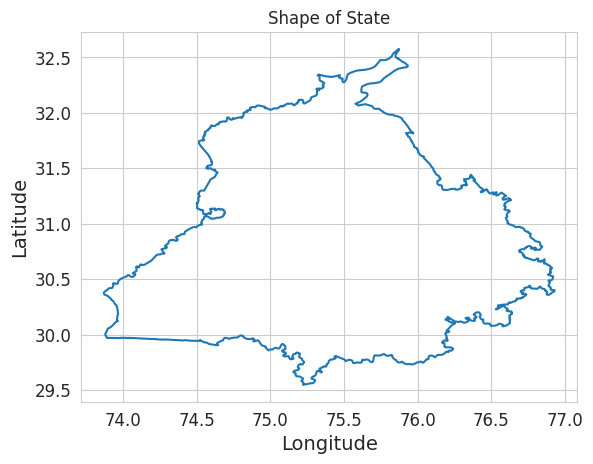

In [ ]:
x, y = state_polygon.exterior.xy

# Plot the polygon using matplotlib
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Shape of State')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [ ]:
points_in_state = [state_polygon.contains(point) for point in point_objects]
np.unique(points_in_state,return_counts=True)

(array([False,  True]), array([ 176, 3582]))

In [ ]:
state_data_refined =  state_data[points_in_state]

In [ ]:
num_removed_points = state_data_refined.shape[0] - state_data.shape[0]
print(f'Number of Removed Points {num_removed_points}')

Number of Removed Points -176


In [ ]:

fig = px.scatter_mapbox(
    state_data_refined,
    lat='Latitude',
    lon='Longitude',
    hover_name='Pincode',
    zoom=5,
    mapbox_style="carto-positron",
title=f'Pincodes in {state}'
)


fig.show()


#

# Calculating Max and Min Latitudeas and Longitudes of state

In [ ]:
coordinates = []
for feature in state_geojson['features']:
    coordinates.extend(feature['geometry']['coordinates'][0])

# Convert to latitudes and longitudes
latitudes = [coord[1] for coord in coordinates]
longitudes = [coord[0] for coord in coordinates]

# Calculate min and max values
min_latitude = min(latitudes)
max_latitude = max(latitudes)
min_longitude = min(longitudes)
max_longitude = max(longitudes)

print(f"Min Latitude: {min_latitude}, Max Latitude: {max_latitude}")
print(f"Min Longitude: {min_longitude}, Max Longitude: {max_longitude}")

Min Latitude: 29.546171, Max Latitude: 32.576191
Min Longitude: 73.870888, Max Longitude: 76.931396


# Implementing K-Means

In [ ]:

#K-Means Clustering

max_iters = 10000

def k_means_clustering(data,no_of_clusters,max_iters):
    #initialize
    
    
    centers = np.empty((no_of_clusters,2))

    for center in range(len(centers)):
        centers[center][0]= np.random.uniform(low=min_latitude,high=max_latitude)
        centers[center][1]=np.random.uniform(low=min_longitude,high=max_longitude)  
    
    # print(f'Centers  {centers}')
    
    #Repeat
    
    current_iters = 0
    num_points_updated= 0
    
    # mappings = dict.fromkeys(data)#dictionary with only keys ,no values
    mappings = np.full(len(data),-1)
    
    
    
    while(current_iters < max_iters):
        num_points_updated= 0
        
        
        #Assign cluster to all points 
        
        
        for data_point_index,data_point in enumerate(data):
            
            distance_from_centers = np.empty(no_of_clusters)
            
            for center in range(len(centers)):
                  distance_from_centers[center] =  np.linalg.norm(np.subtract(data_point, centers[center]),ord=2)
            
            
            
            # print(distance_from_centers)
            # 
            
            
            cluster = np.argmin(distance_from_centers)
            # print(cluster)
            
            if mappings[data_point_index] != cluster:
                mappings[data_point_index] = cluster
                num_points_updated +=1
            
            
      
        # print(np.unique(mappings,return_counts=True))    
        #update the centroid values
        
        for i in range(no_of_clusters):
            cluster_points = [data_point2 for data_point_index2,data_point2 in enumerate(data) if mappings[data_point_index2] == i ] 
         
            # print(f'Cluster {i}       len(cluster_points) = {len(cluster_points)} '  )   
            if len(cluster_points) != 0:
                centers[i] = (np.sum(cluster_points,axis = 0))/len(cluster_points)
      
        
        # print(f'  Iteration {current_iters}  Centers  {centers}')
        current_iters+=1
   

    
        if(num_points_updated == 0):
            break
        
    return (centers,mappings)

# Find the optimal number of clusters 

# Using Elbow Method

In [ ]:


no_of_districts = len(np.unique(state_data_refined['District'].values))
data = state_data_refined[['Latitude','Longitude']].values
wcss=[]

for no_of_clusters in range(1,no_of_districts+1):
    
    # Calculate centers 
    centers,mappings = k_means_clustering(data,no_of_clusters,100)
    
    for cluster in range(no_of_clusters):
         cluster_points = [data_point2 for data_point_index2,data_point2 in enumerate(data) if mappings[data_point_index2] == cluster ] 
         within_cluster_distances_sum=0
         for cluster_point in cluster_points:
             within_cluster_distances_sum += np.linalg.norm(np.subtract(cluster_point ,centers[cluster] ),ord=2)
    wcss.append(within_cluster_distances_sum)

        


            
    

    # Find WCSS

KeyboardInterrupt: 

In [ ]:
plt.plot(np.arange(1,no_of_districts+1),wcss)
plt.xticks(np.arange(1,no_of_districts+1))


# Using Silhouette Method 

In [ ]:

# data = state_data_refined[['Latitude','Longitude']].values
# avg_scores=[]
# 
# 
# for no_of_clusters in range(1,no_of_districts+1):
# 
#     centers,mappings = k_means_clustering(data,no_of_clusters,100)
# 
# 
#     sample_scores = 0
# 
# 
#     for point_index,point in enumerate(data):
#         my_cluster = mappings[point_index]
# 
# 
#         my_cluster_points = [data_point2 for data_point_index2,data_point2 in enumerate(data) if mappings[data_point_index2] == my_cluster] 
# 
#         # Calcluating a 
# 
#         wcd=[]
#         for other_cluster_point_of_same_cluster in my_cluster_points:
#                wcd.append(np.linalg.norm(np.subtract(point,other_cluster_point_of_same_cluster),ord=2))
#         a = np.sum(wcd)/len(wcd)
#         # print(a)
# 
#         # Calculating b ##
# 
# 
# 
#         #Identifying the nearest cluster
# 
#         avg_distances_between_other_clusters_and_given_point   = [ ] 
#         for other_cluster in range(no_of_clusters):
#             if other_cluster == my_cluster:
#                 avg_distances_between_other_clusters_and_given_point.append(100000)
#                 continue
# 
# 
# 
# 
# 
# 
# 
# 
#             distances =0
#             other_cluster_points = [data_point2 for data_point_index2,data_point2 in enumerate(data) if mappings[data_point_index2] == other_cluster ] 
# 
# 
#             for other_cluster_point in other_cluster_points:
#                 distances += np.linalg.norm(np.subtract(point,other_cluster_point),ord=2)
# 
#             if (len(other_cluster_points)==0):
#                 avg_distances_between_other_clusters_and_given_point.append(100000)
#             else:
#                 avg_distances_between_other_clusters_and_given_point.append(distances/len(other_cluster_points))
# 
# 
#         nearest_cluster = np.argmin(avg_distances_between_other_clusters_and_given_point)
# 
# 
#         # Calculating avg distances between sample and nearest cluster points
#         nearest_cluster_points = [data_point2 for data_point_index2,data_point2 in enumerate(data) if mappings[data_point_index2] == nearest_cluster]
# 
# 
#         nearest_cluster_sum=0
#         for nearest_cluster_point in nearest_cluster_points:
#             nearest_cluster_sum+= np.linalg.norm(np.subtract(point,nearest_cluster_point),ord=2)
# 
# 
#         b= nearest_cluster_sum / len(nearest_cluster_points)
# 
# 
#         score =  (b-a )/max(a,b)
# 
#         sample_scores +=    score
# 
#     avg_score = sample_scores / len(data)
# 
# 
# 
#     print(f'Silhouette Score:{avg_score}  for k= {no_of_clusters}')
#     avg_scores.append(avg_score)


In [ ]:
# plt.plot(np.arange(1,no_of_districts+1),avg_scores)
# plt.xticks(np.arange(1,no_of_districts+1))
# plt.xlabel('No of Clusters')
# plt.ylabel('Silhouette Score')




# Interpretation of results

Choose k = 16   
- As no cluster center was outside the state
- And it is one of the local maxima in No of Clusters vs Silhouette Score Graph

# Clustering the data with optimal number of Clusters

In [ ]:

num_clusters = 16
data = state_data_refined[['Latitude','Longitude']].values

cluster_centers, mappings  = k_means_clustering(data,num_clusters,100)
state_data_refined.loc[:,'cluster'] = mappings


# Visualizing the Clusters

In [ ]:


fig= px.scatter_mapbox(
    data_frame= state_data_refined,
    lat='Latitude',
    lon='Longitude',
    hover_name='Pincode',
    color='cluster',
    color_continuous_scale = px.colors.qualitative.Vivid,
    zoom=6,
    mapbox_style="carto-positron",
title=f'Pincodes in {state}',

)

fig.add_trace(go.Scattermapbox(
    lat=cluster_centers[:,0],
    lon=cluster_centers[:,1],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color='black', 
        symbol='circle' # You can change the symbol as needed
    ),
    text=state_data_refined['cluster'],
    # hovertext=f'{state_data_refined['Pincode'] }',
    name='Cluster Centers' # Name for the legend
))



fig.show()

# Actual Distribution of Districts

In [ ]:

fig2= px.scatter_mapbox(
    data_frame= state_data_refined,
    lat='Latitude',
    lon='Longitude',
    hover_name='Pincode',
    color='District',
    color_continuous_scale = px.colors.qualitative.Vivid,
    zoom=6,
    mapbox_style="carto-positron",
title=f'Pincodes in {state}',

)
fig2.show()



# Observations


-  Clearly there are visible wrong data with many points having wrong districts than Actual 




# Comparing Actual vs Predicted

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

predicted_state = cv2.imread('../Task 1/Predicted_State_District_Map_cropped.png')
actual_state = cv2.imread('../Task 1/Actual_State_District_Map.jpg')

plt.subplots(1,2,figsize=(20,40))

fig1 = plt.subplot(1,2,1)
plt.imshow(actual_state)
plt.title('Actual State')

fig2 = plt.subplot(1,2,2)
plt.imshow(predicted_state)
plt.title('Predicted State')



plt.show()

# There is a mismatch of no of districts owing to wrong data
- Actual 23
- Predicted 16

But roughly clusters have been rightly identified